In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [63]:
# data loading
data = pd.read_csv('bank-additional-full.csv', sep= ';') 

# making a copy of data dataframe
df = data.copy()

# previewing the dataset
print(df.head())
print(df.info())
print(df.shape)
print(df.describe())
print(df.columns)
print(df['day_of_week'].unique())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

There are 12 duplicate rows
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


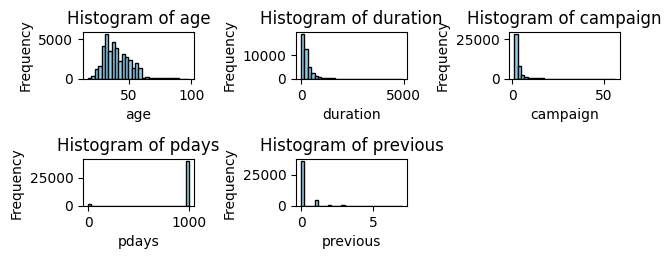

age: 468 outliers
duration: 2963 outliers
campaign: 2406 outliers
pdays: 1515 outliers
previous: 5625 outliers
                age      duration      campaign         pdays      previous  \
count  38770.000000  38770.000000  38770.000000  38770.000000  38770.000000   
mean      40.015966    262.520660      2.044338    960.632706      0.180578   
std       10.447652    259.431637      1.280339    191.383976      0.504890   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       32.000000    106.000000      1.000000    999.000000      0.000000   
50%       38.000000    184.000000      2.000000    999.000000      0.000000   
75%       47.000000    323.000000      3.000000    999.000000      0.000000   
max       98.000000   4918.000000      6.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  38770.000000    38770.000000   38770.000000  38770.000000  38770.000000  
mean       0.03

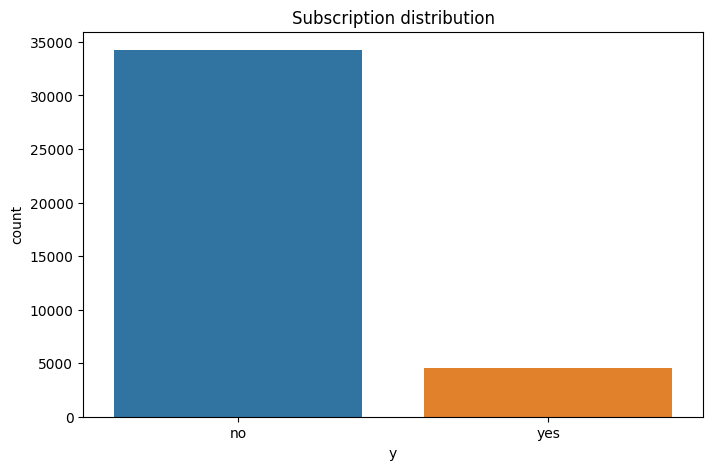

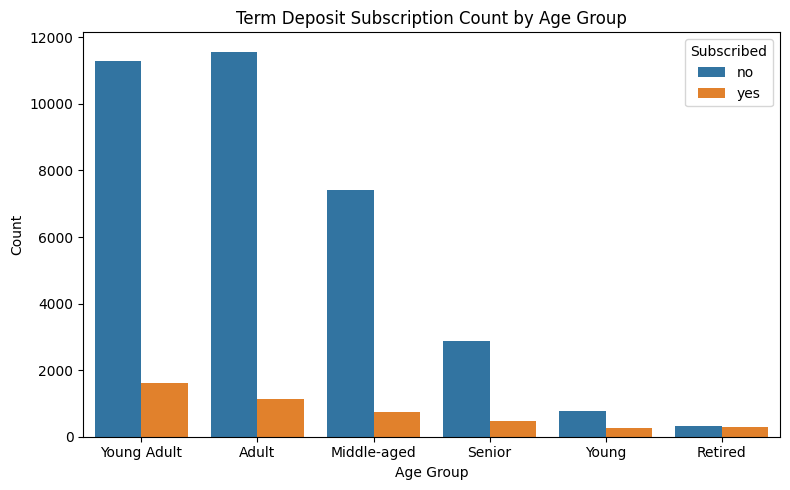

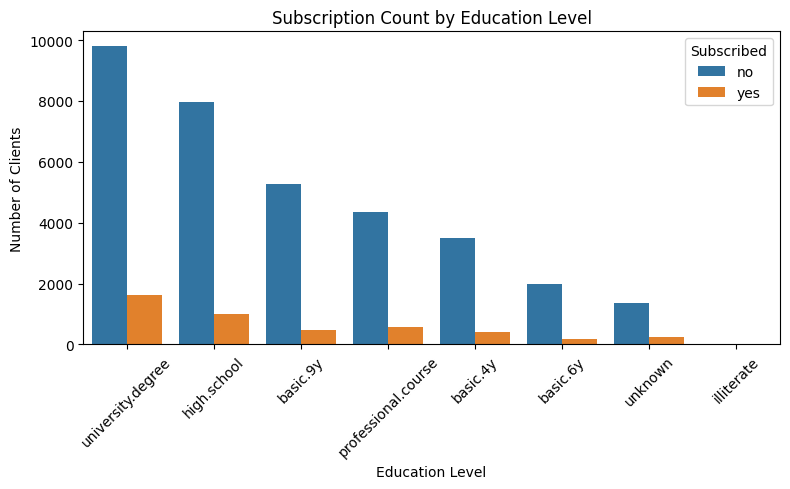

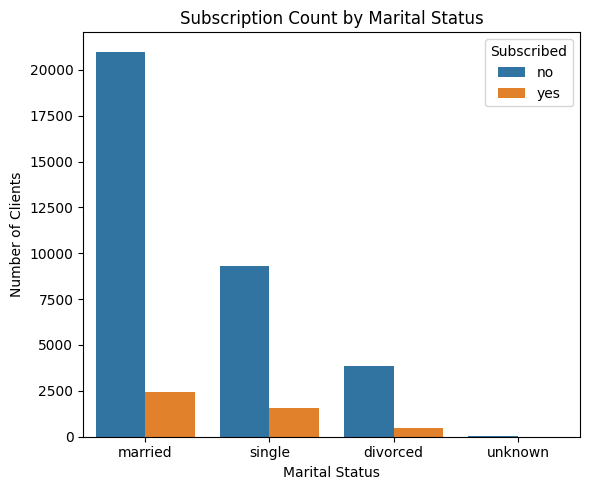

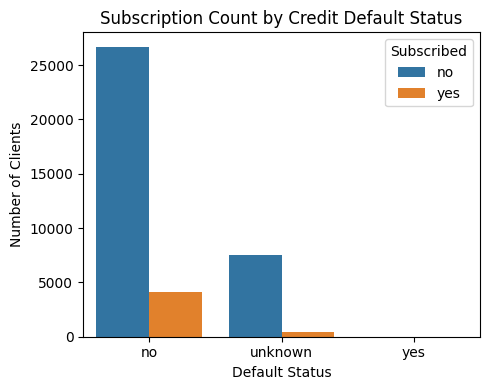

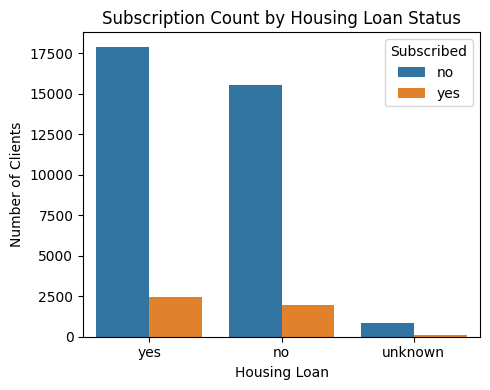

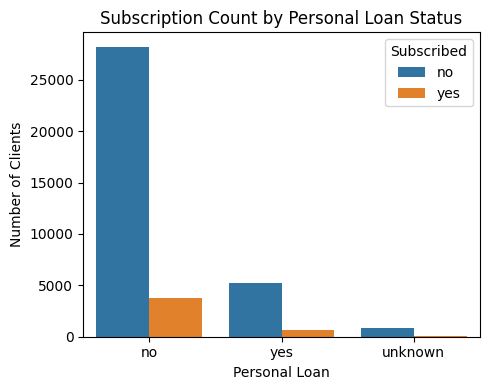

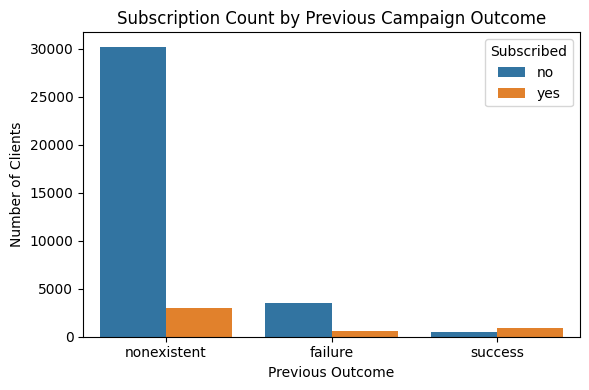

In [55]:
# exploratory data analysis

# checking for duplicates 
duplicate_count= df.duplicated().sum() # this counts the duplicated rows in the dataframe
print(f"There are {duplicate_count} duplicate rows")
df= df.drop_duplicates() # removing duplicate rows

# checking for missing values
print(df.isna().sum())


numerical_columns= ['age',  'duration', 'campaign', 'pdays',
       'previous']


# plotting numerical columns
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i+1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

# finding outliers
outliers_dict = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = outliers.shape[0]

for col, count in outliers_dict.items():
    print(f"{col}: {count} outliers")


# dropping outliers for campaign column
# calculate interquartile range for campaign column
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter out outliers from campaign column
df = df[(df['campaign'] >= lower_bound) & (df['campaign'] <= upper_bound)]

print(df.describe())


# creating age groups
df['age_group'] = pd.cut(df['age'],
                         bins=[0, 24, 34, 44, 54, 64, 100],
                         labels=['Young', 'Young Adult', 'Adult', 'Middle-aged', 'Senior', 'Retired'])

# exploring subscription count 
plt.figure(figsize=(8,5))
sns.countplot(x='y',hue='y', data=df)
plt.title("Subscription distribution")
plt.show()

# plotting features by the target
# plotting subscription count by age group
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='age_group', hue='y', order=df['age_group'].value_counts().index)
plt.title("Term Deposit Subscription Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Subscribed")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# plotting subscription count by education level
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='education', hue='y', order=df['education'].value_counts().index)
plt.title("Subscription Count by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Clients")
plt.legend(title="Subscribed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# plotting subscription count by marital status
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='marital', hue='y', order=df['marital'].value_counts().index)
plt.title("Subscription Count by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Clients")
plt.legend(title="Subscribed")
plt.tight_layout()
plt.show()


# plotting subscription count by credit default status
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='default', hue='y', order=df['default'].value_counts().index)
plt.title("Subscription Count by Credit Default Status")
plt.xlabel("Default Status")
plt.ylabel("Number of Clients")
plt.legend(title="Subscribed")
plt.tight_layout()
plt.show()


# plotting subscription count by housing loan status
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='housing', hue='y', order=df['housing'].value_counts().index)
plt.title("Subscription Count by Housing Loan Status")
plt.xlabel("Housing Loan")
plt.ylabel("Number of Clients")
plt.legend(title="Subscribed")
plt.tight_layout()
plt.show()


# plotting subscription count by personal loan status
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='loan', hue='y', order=df['loan'].value_counts().index)
plt.title("Subscription Count by Personal Loan Status")
plt.xlabel("Personal Loan")
plt.ylabel("Number of Clients")
plt.legend(title="Subscribed")
plt.tight_layout()
plt.show()


# plotting subscription count by previous campaign outcome
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='poutcome', hue='y', order=df['poutcome'].value_counts().index)
plt.title("Subscription Count by Previous Campaign Outcome")
plt.xlabel("Previous Outcome")
plt.ylabel("Number of Clients")
plt.legend(title="Subscribed")
plt.tight_layout()
plt.show()


In [56]:
print(df['poutcome'].unique())
# label encoding
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome' , 'age_group']

# encoding target variable 
df['y'] = df['y'].map({'yes': 1, 'no': 0})

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())


['nonexistent' 'failure' 'success']
   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
0            1  ...    999         0         1           1.1          93.994   
1            1  ...    999         0         1           1.1          93.994   
2            1  ...    999         0         1           1.1          93.994   
3            1  ...    999         0         1           1.1          93.994   
4            1  ...    999         0         1           1.1          93.994   

   cons.conf.idx  euribor3m  nr.

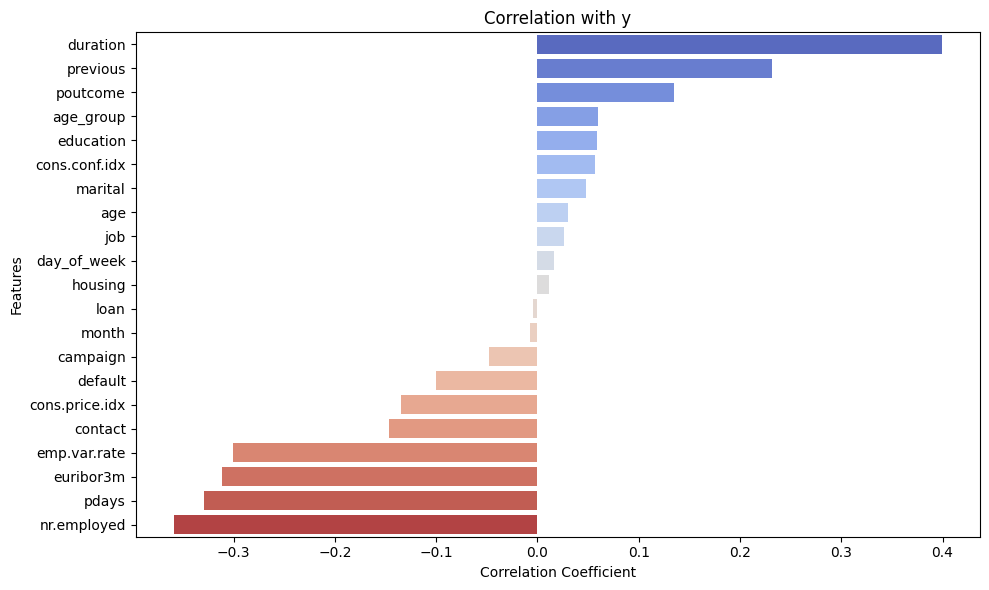

In [7]:
# checking correlation with target variable y
correlation = df.corr()['y'].sort_values(ascending=False).drop('y')

# plotting correlation with target variable y
plt.figure(figsize=(10,6))
sns.barplot(
    x=correlation.values,
    y=correlation.index,
    hue=correlation.index,
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title("Correlation with y")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()  #this adjusts spacing automatically
plt.show()



In [8]:
# choosing features
X = df.drop(['y', 'loan', 'marital'], axis=1)   #features
y = df['y']    #target

# train/test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)

# evaluating Logistic Regression model
y_pred_logreg = log_reg.predict(X_test)
print("\n=== Logistic Regression Results ===")
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))




=== Logistic Regression Results ===
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      6848
           1       0.43      0.88      0.57       906

    accuracy                           0.85      7754
   macro avg       0.70      0.86      0.74      7754
weighted avg       0.92      0.85      0.87      7754

Confusion Matrix:
 [[5778 1070]
 [ 112  794]]
ROC AUC Score: 0.9297624481648821


c:\Users\Kezia Helena\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
# Random Forest model
# training Random Forest model
model = RandomForestClassifier(n_estimators = 100, random_state=42, class_weight= 'balanced')
model.fit(X_train, y_train)

# evaluating the Random Forest model
y_pred = model.predict(X_test)
print("\n=== Random Forest Results ===")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


=== Random Forest Results ===

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      6848
           1       0.65      0.50      0.56       906

    accuracy                           0.91      7754
   macro avg       0.79      0.73      0.76      7754
weighted avg       0.90      0.91      0.90      7754

Confusion Matrix:
 [[6608  240]
 [ 456  450]]
ROC AUC Score: 0.9439230577303955


In [62]:
import joblib
joblib.dump(model, "term_deposit_model.pkl")

print(df['day_of_week'].unique())


[1 3 4 2 0]


In [64]:
import streamlit as st
import numpy as np
import joblib

# Load trained model
model = joblib.load("term_deposit_model.pkl")

# Mappings (these must match the ones used during model training)
job_map = {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3,
           'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7,
           'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}

education_map = {'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3,
                 'illiterate': 4, 'professional.course': 5, 'university.degree': 6,
                 'unknown': 7}

default_map = {'no': 0, 'yes': 2, 'unknown': 1}
housing_map = {'no': 0, 'yes': 2, 'unknown': 1}
contact_map = {'cellular': 0, 'telephone': 1}
month_map = {'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5,
             'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}
day_map = {'mon': 1, 'tue': 3, 'wed': 4, 'thu': 2, 'fri': 0}
poutcome_map = {'failure': 0, 'nonexistent': 1, 'success': 2}

# App UI
st.title("Term Deposit Subscription Predictor")

age = st.slider("Age", 18, 95)
job = st.selectbox("Job", list(job_map.keys()))
education = st.selectbox("Education", list(education_map.keys()))
default = st.selectbox("Credit Default", list(default_map.keys()))
housing = st.selectbox("Housing Loan", list(housing_map.keys()))
contact = st.selectbox("Contact Communication", list(contact_map.keys()))
month = st.selectbox("Last Contact Month", list(month_map.keys()))
day_of_week = st.selectbox("Day of Week", list(day_map.keys()))
poutcome = st.selectbox("Previous Campaign Outcome", list(poutcome_map.keys()))
duration = st.number_input("Last Contact Duration (seconds)", 0, 5000, 100)
campaign = st.number_input("Number of Contacts During Campaign", 1, 50, 1)
pdays = st.number_input("Days Since Last Contact", 0, 999, 999)
previous = st.number_input("Number of Previous Contacts", 0, 50, 0)

# Button
if st.button("Predict"):
    # Encode categorical variables
    features = np.array([
        age,
        duration,
        campaign,
        pdays,
        previous,
        job_map[job],
        education_map[education],
        default_map[default],
        housing_map[housing],
        contact_map[contact],
        month_map[month],
        day_map[day_of_week],
        poutcome_map[poutcome]
    ])

    # Make prediction
    prediction = model.predict(features.reshape(1, -1))
    result = "Subscribed ✅" if prediction[0] == 1 else "Not Subscribed ❌"
    st.success(f"Prediction: {result}")


2025-06-17 10:25:08.671 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 10:25:10.090 
  command:

    streamlit run C:\Users\Kezia Helena\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-17 10:25:10.099 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 10:25:10.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 10:25:10.113 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 10:25:10.117 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 10:25:10.154 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-17 10:25:10.1